In [1]:
from arima import ARIMAModel
import pandas as pd


In [2]:
df = pd.read_csv("vendas_varejo_pe.csv", sep=';')

In [3]:
# Crie uma função para converter as datas
def convert_data(data_str):
    # Mapeie os nomes dos meses para seus números equivalentes
    meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4, 'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

    # Divida a string da data em partes
    partes = data_str.split('/')

    # Converta o mês para um número
    mes_num = meses[partes[0].lower()]

    # Adicione o ano e o mês ao novo formato de data
    nova_data = pd.to_datetime(f'20{partes[1]}-{mes_num:02d}')

    return nova_data

# Aplique a função de conversão à coluna 'data'
df['data'] = df['data'].apply(convert_data)

# Agora, 'data' está no formato de data e pode ser usada como índice para uma série temporal
# df.set_index('data', inplace=True)

# Agora você pode estudar a série temporal
print(df)

          data  Venda
0   2000-01-01     56
1   2000-02-01   54,4
2   2000-03-01   53,6
3   2000-04-01   53,5
4   2000-05-01   57,1
..         ...    ...
184 2015-05-01  110,6
185 2015-06-01  106,7
186 2015-07-01  106,8
187 2015-08-01  106,7
188 2015-09-01  100,2

[189 rows x 2 columns]


In [4]:
df.set_index('data', inplace=True)
df.columns = ["target"]
df['target'] = df['target'].str.replace(',','.')
df['target'] = pd.to_numeric(df['target'])

In [5]:
df

,target
data,
2000-01-01,56.0
2000-02-01,54.4
2000-03-01,53.6
2000-04-01,53.5
2000-05-01,57.1
...,...
2015-05-01,110.6
2015-06-01,106.7
2015-07-01,106.8


In [6]:
model = ARIMAModel(df)

In [8]:
model.grid_search(5, 5, train_split=0.8, max_d=5,)



TypeError: ARIMAModel.check_stationarity() got an unexpected keyword argument 'threshold'

In [ ]:
model3 = ARIMAModel(serie_diferenciada) 

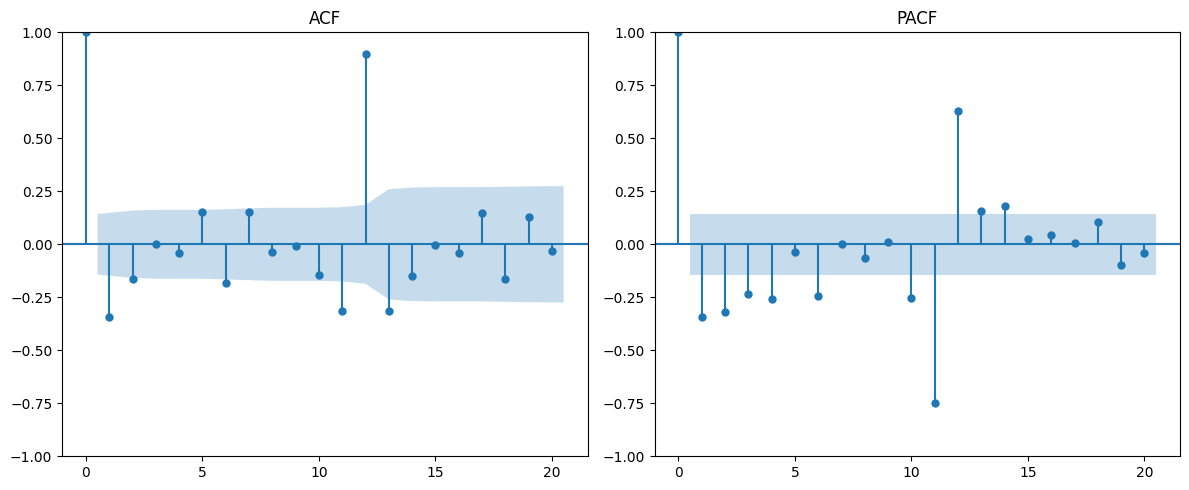

{'ADF Statistic': -1.013086622690519,
 'p-value': 0.7484613813891374,
 'Critical Values': {'1%': -3.4685016947910636,
  '5%': -2.8782983668563396,
  '10%': -2.57570415906989},
 'Is Stationary': False}

In [ ]:
model3.check_stationarity()

In [ ]:
serie_diferenciada2 = model3.transform_series()

In [ ]:
model4 = ARIMAModel(serie_diferenciada2)

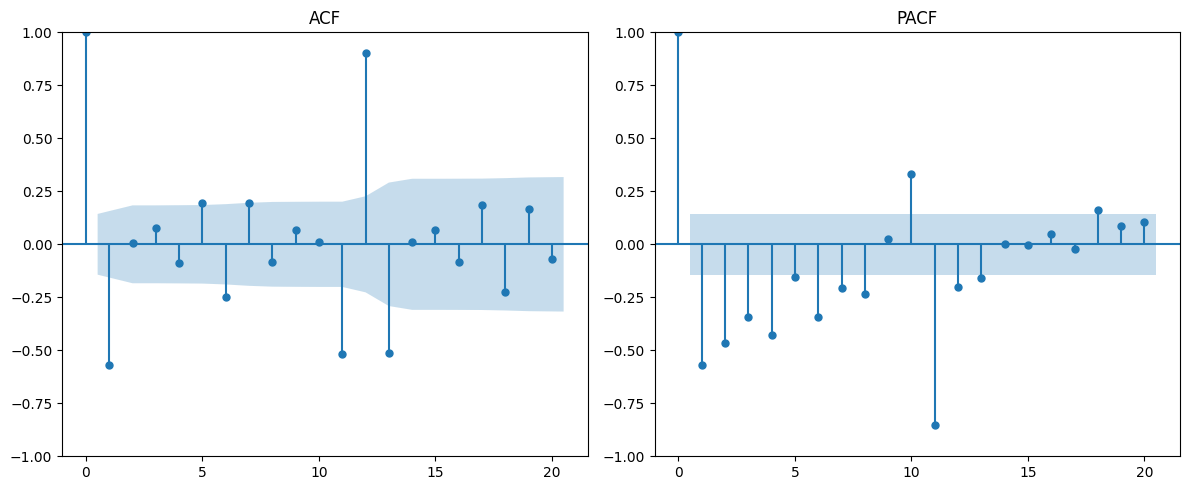

{'ADF Statistic': -13.186565536687919,
 'p-value': 1.1669090930950202e-24,
 'Critical Values': {'1%': -3.4685016947910636,
  '5%': -2.8782983668563396,
  '10%': -2.57570415906989},
 'Is Stationary': True}

In [ ]:
model4.check_stationarity()

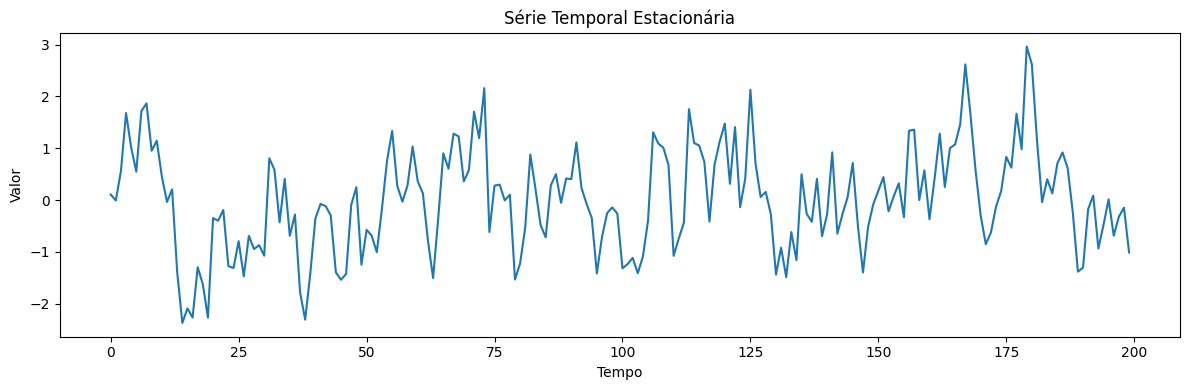

Média: 1.7763568394002505e-17
Variância: 1.0
Autocorrelação (primeiros 5 lags): [1.         0.64415196 0.41875512 0.2806967  0.17912248]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir semente para reprodutibilidade
np.random.seed(42)

# Parâmetros da série temporal
n = 200  # número de pontos
phi = 0.7  # coeficiente de autocorrelação (para garantir estacionariedade)

# Gerar série temporal estacionária
series = np.zeros(n)
white_noise = np.random.normal(0, 1, n)

# Processo AR(1)
for t in range(1, n):
    series[t] = phi * series[t-1] + white_noise[t]

# Normalizar a série
series = (series - np.mean(series)) / np.std(series)

# Plotar a série temporal
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title('Série Temporal Estacionária')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# Função para verificar estacionariedade
def check_stationarity(series):
    # Média
    mean = np.mean(series)
    
    # Variância
    variance = np.var(series)
    
    # Autocorrelação
    acf = np.correlate(series, series, mode='full')[len(series)-1:]
    acf /= acf[0]
    
    print(f"Média: {mean}")
    print(f"Variância: {variance}")
    print(f"Autocorrelação (primeiros 5 lags): {acf[:5]}")

# Verificar estacionariedade
check_stationarity(series)

# Salvar série para uso posterior
np.savetxt('stationary_series.csv', series, delimiter=',')

In [ ]:
model1 = ARIMAModel(pd.read_csv('stationary_series.csv', header=None))

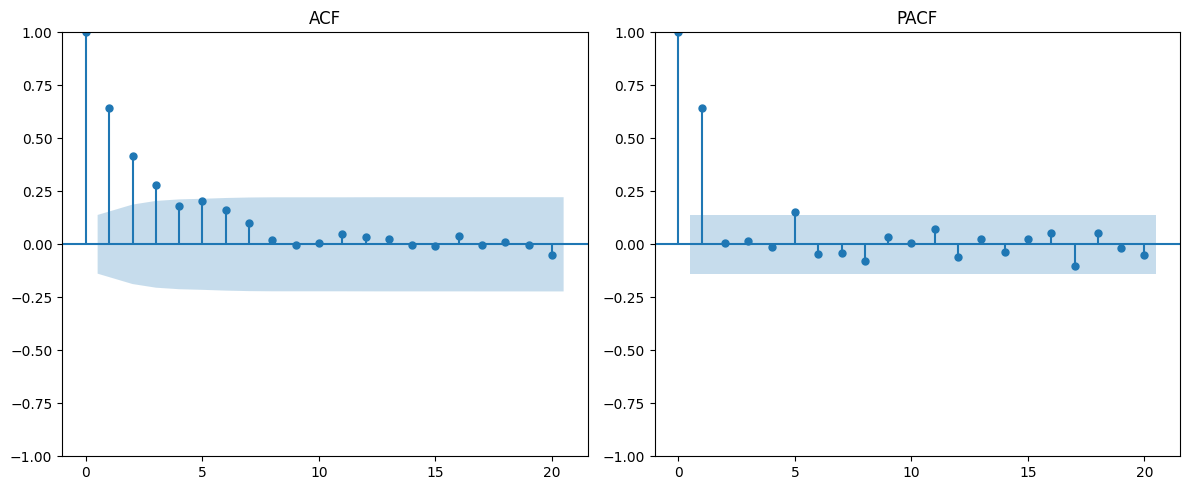

{'ADF Statistic': -6.463887296823866,
 'p-value': 1.4209710752603141e-08,
 'Critical Values': {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 'Is Stationary': True}

In [ ]:
model1.check_stationarity()

In [ ]:
serie_diferenciada = model.transform_series(diff_order=2)

In [ ]:
model2 = ARIMAModel(serie_diferenciada)

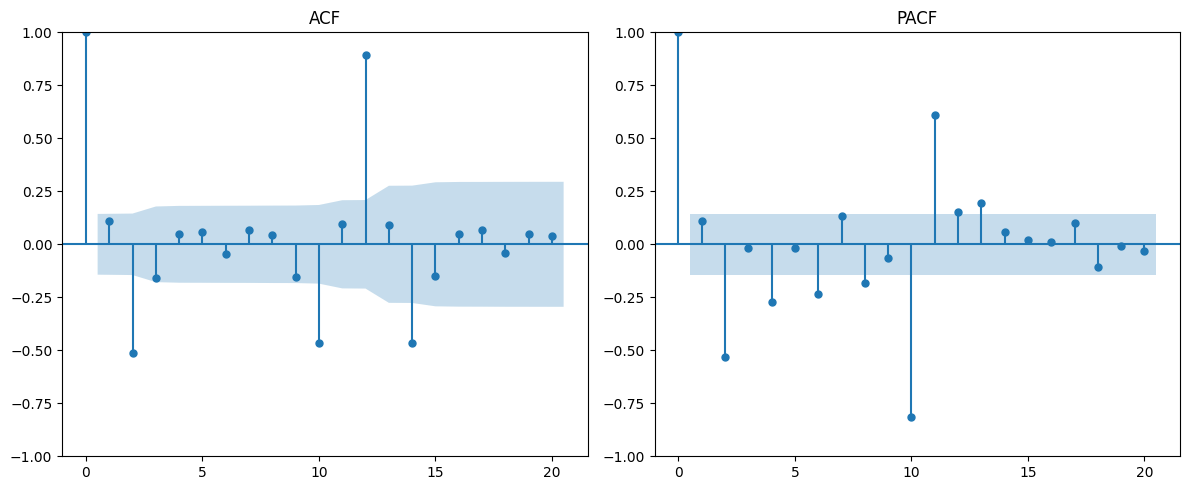

{'ADF Statistic': -1.0162270956060477,
 'p-value': 0.7472999268586761,
 'Critical Values': {'1%': -3.4685016947910636,
  '5%': -2.8782983668563396,
  '10%': -2.57570415906989},
 'Is Stationary': False}

In [ ]:
model2.check_stationarity()